# Podstawy Przetwarzania Dużych Zbiorów Danych

Grupa IBD4 Poniedziałki 8:30

Łukasz Moskwa 247739

Artur Szewczykowski 252546


### 0.0 Importy i wczytanie do df

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df_data = pd.read_csv("../wyniki/final_data.csv")

In [2]:
display(df_data) #wrzucone dla wygody, można usunąc przed odpowiedzią

,Country_name,3_letter_code,population_urban,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,Total_tested,...,Crime_Rate_2012,Crime_Rate_2013,Crime_Rate_2014,Crime_Rate_2015,Crime_Rate_2016,Crime_Rate_2017,Crime_Rate_2018,Crime_Rate_2019,Crime_Rate_2020,Crime_Rate_2021
0,Colombia,COL,40827302.0,3.272787e+11,2021-03-14,2728,149,54597.0,6306.0,30968,...,35.908982,33.353569,28.585233,27.128764,26.040422,25.434488,26.231325,25.753473,24.242763,27.484365
1,Colombia,COL,40827302.0,3.272787e+11,2021-03-15,4440,158,65338.0,5419.0,41720,...,35.908982,33.353569,28.585233,27.128764,26.040422,25.434488,26.231325,25.753473,24.242763,27.484365
2,Colombia,COL,40827302.0,3.272787e+11,2021-03-16,5093,142,59933.0,2243.0,34063,...,35.908982,33.353569,28.585233,27.128764,26.040422,25.434488,26.231325,25.753473,24.242763,27.484365
3,Colombia,COL,40827302.0,3.272787e+11,2021-03-17,5802,162,42313.0,5908.0,46016,...,35.908982,33.353569,28.585233,27.128764,26.040422,25.434488,26.231325,25.753473,24.242763,27.484365
4,Colombia,COL,40827302.0,3.272787e+11,2021-03-18,6591,142,51364.0,774.0,43986,...,35.908982,33.353569,28.585233,27.128764,26.040422,25.434488,26.231325,25.753473,24.242763,27.484365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31435,South Africa,ZAF,39149717.0,3.559114e+11,2022-06-09,1591,20,16404.0,16781.0,20865,...,30.507084,31.598028,32.532699,33.418340,33.703002,35.903188,36.662249,36.712138,33.964874,41.865728
31436,South Africa,ZAF,39149717.0,3.559114e+11,2022-06-13,710,41,838.0,854.0,10493,...,30.507084,31.598028,32.532699,33.418340,33.703002,35.903188,36.662249,36.712138,33.964874,41.865728
31437,South Africa,ZAF,39149717.0,3.559114e+11,2022-06-14,1903,26,14113.0,13788.0,22417,...,30.507084,31.598028,32.532699,33.418340,33.703002,35.903188,36.662249,36.712138,33.964874,41.865728
31438,South Africa,ZAF,39149717.0,3.559114e+11,2022-06-20,1087,20,566.0,654.0,14018,...,30.507084,31.598028,32.532699,33.418340,33.703002,35.903188,36.662249,36.712138,33.964874,41.865728


### Część 1 (poziom podstawowy) - wykresy pudełkowe
TODO - ładniejsze podpisy i kolory

### 1.1.-1.3. Nowe zachorowania, śmierci i szczepienia

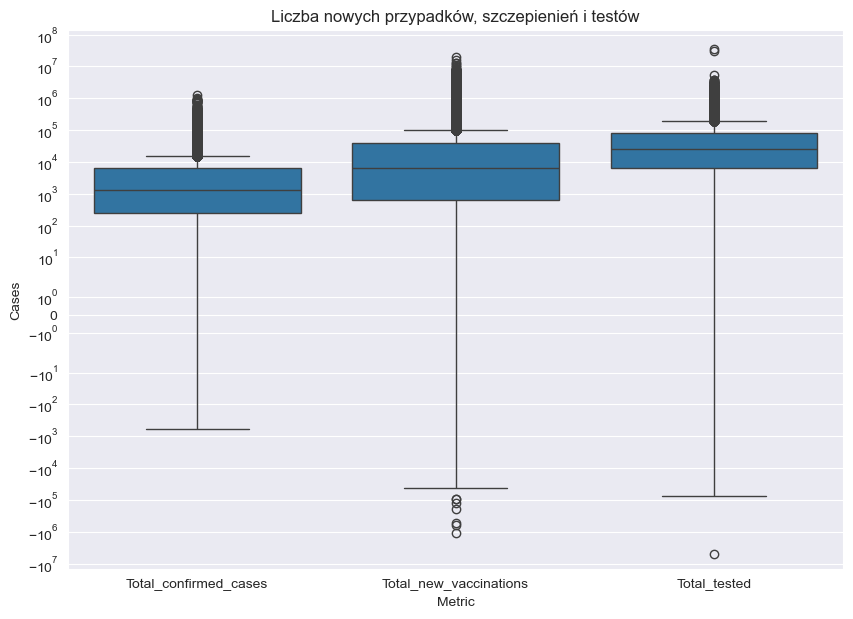

In [3]:
df_filtered = df_data.melt(
    value_vars=["Total_confirmed_cases", "Total_new_vaccinations", "Total_tested"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 7))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.ylim(df_filtered["Cases"].min()-10000000, df_filtered["Cases"].max()+100000000)
plt.yscale("symlog")
plt.title("Liczba nowych przypadków, szczepienień i testów")

plt.show()

### 1.4. Populacja i 1 dodatkowa kolumna

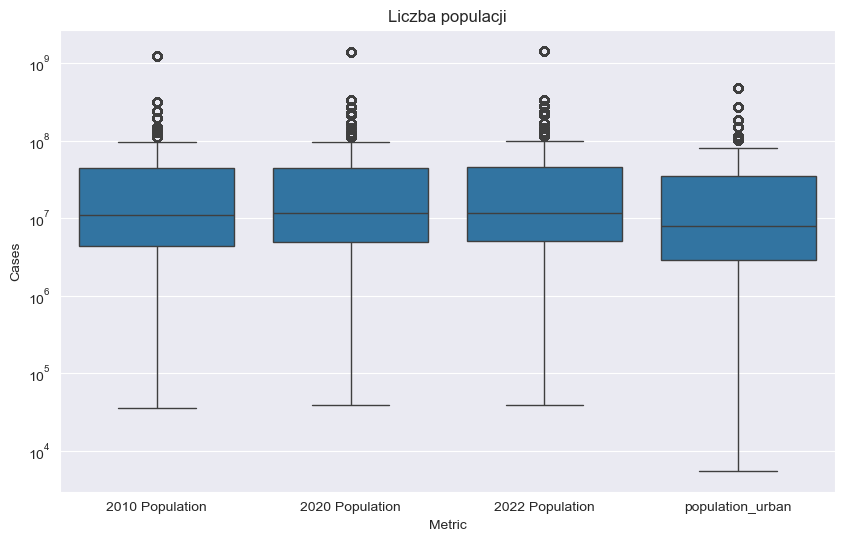

In [4]:
df_filtered = df_data.melt(
    value_vars=["2010 Population", "2020 Population", "2022 Population", "population_urban"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.yscale("log")
plt.title("Liczba populacji")

plt.show()

Populacja w miastach mniejsza niż całej ludzkości - zjawisko pożądane

### 1.5. PKB

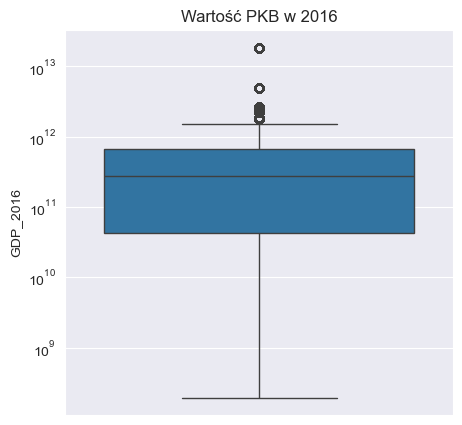

In [5]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_data, y="GDP_2016")
plt.yscale("log")
plt.title("Wartość PKB w 2016")

plt.show()

Przydałoby się PKB z okresu pandemii. Może dopisać je jeszcze z bigQueery

### 1.6. Trzy dodatkowe kolumny

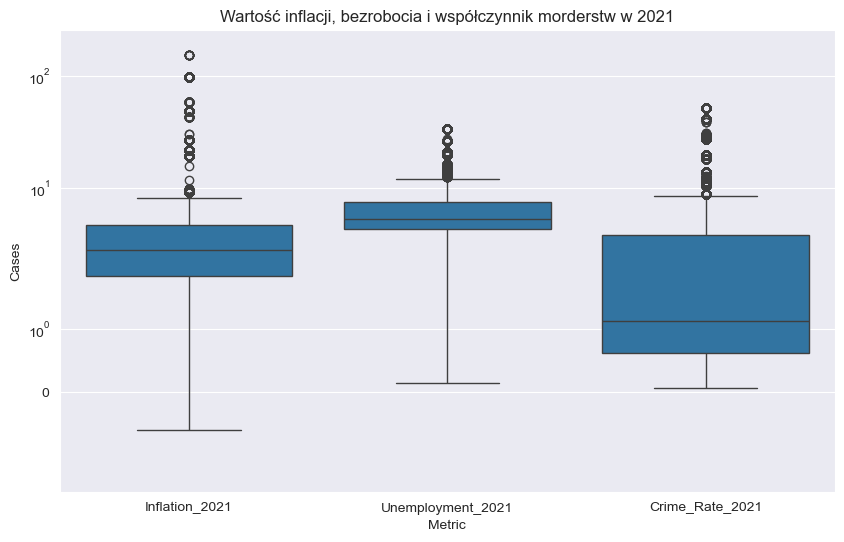

In [6]:
df_filtered = df_data.melt(
    value_vars=["Inflation_2021", "Unemployment_2021", "Crime_Rate_2021"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.ylim(df_filtered["Cases"].min()-1, df_filtered["Cases"].max()+100)
plt.yscale("symlog")
plt.title("Wartość inflacji, bezrobocia i współczynnik morderstw w 2021")

plt.show()

Zakres wartości oraz wartości odstające wyglądają na realne, w tym także ujemne wartości inflacji, czyli deflacja.
Crimerate jest wartością mocno różniącą się pomiędzy krajami, bezrobocie - niezbyt.

### Część 3 (poziom podstawowy) - obliczenia statystyczne

TODO:
- zmienić Portugalię i może też Grecję na coś innego
- opisać klucz doboru państw (podobne pkb per capita)
- poprawić estetykę wykresów
- napisać wnioski z wykresów

In [7]:
countries = ["Portugal", "Lithuania", "Slovakia", "Latvia", "Greece", "Hungary",
                      "Poland", "Croatia", "Bulgaria", "Turkey"]

df_filtered = df_data[
    (df_data["Country_name"].isin(countries)) &
    (df_data["date"].str.startswith("2021-04"))]
display (df_filtered)

,Country_name,3_letter_code,population_urban,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,Total_tested,...,Crime_Rate_2012,Crime_Rate_2013,Crime_Rate_2014,Crime_Rate_2015,Crime_Rate_2016,Crime_Rate_2017,Crime_Rate_2018,Crime_Rate_2019,Crime_Rate_2020,Crime_Rate_2021
5405,Hungary,HUN,6999582.0,1.579864e+11,2021-04-01,8637,242,90732.0,75988.0,39993,...,1.249732,1.556398,1.479545,2.244966,2.058052,1.634498,0.879673,0.654946,0.820465,0.772417
5406,Hungary,HUN,6999582.0,1.579864e+11,2021-04-02,6566,211,79051.0,27807.0,36598,...,1.249732,1.556398,1.479545,2.244966,2.058052,1.634498,0.879673,0.654946,0.820465,0.772417
5407,Hungary,HUN,6999582.0,1.579864e+11,2021-04-03,3874,213,76770.0,14115.0,27094,...,1.249732,1.556398,1.479545,2.244966,2.058052,1.634498,0.879673,0.654946,0.820465,0.772417
5408,Hungary,HUN,6999582.0,1.579864e+11,2021-04-04,1890,170,50338.0,7895.0,18908,...,1.249732,1.556398,1.479545,2.244966,2.058052,1.634498,0.879673,0.654946,0.820465,0.772417
5409,Hungary,HUN,6999582.0,1.579864e+11,2021-04-05,1933,311,69474.0,9874.0,11194,...,1.249732,1.556398,1.479545,2.244966,2.058052,1.634498,0.879673,0.654946,0.820465,0.772417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30313,Slovakia,SVK,2930419.0,1.061197e+11,2021-04-26,682,39,6972.0,18214.0,157244,...,1.386505,1.440513,1.328519,0.884883,1.104728,1.470746,1.230092,1.393492,1.154548,1.009615
30314,Slovakia,SVK,2930419.0,1.061197e+11,2021-04-27,564,36,5446.0,15832.0,145927,...,1.386505,1.440513,1.328519,0.884883,1.104728,1.470746,1.230092,1.393492,1.154548,1.009615
30315,Slovakia,SVK,2930419.0,1.061197e+11,2021-04-28,467,37,6226.0,16024.0,162631,...,1.386505,1.440513,1.328519,0.884883,1.104728,1.470746,1.230092,1.393492,1.154548,1.009615
30316,Slovakia,SVK,2930419.0,1.061197e+11,2021-04-29,509,48,7478.0,16760.0,307448,...,1.386505,1.440513,1.328519,0.884883,1.104728,1.470746,1.230092,1.393492,1.154548,1.009615


### 3.1. Średnia liczba zachorowań, śmierci i szczepień

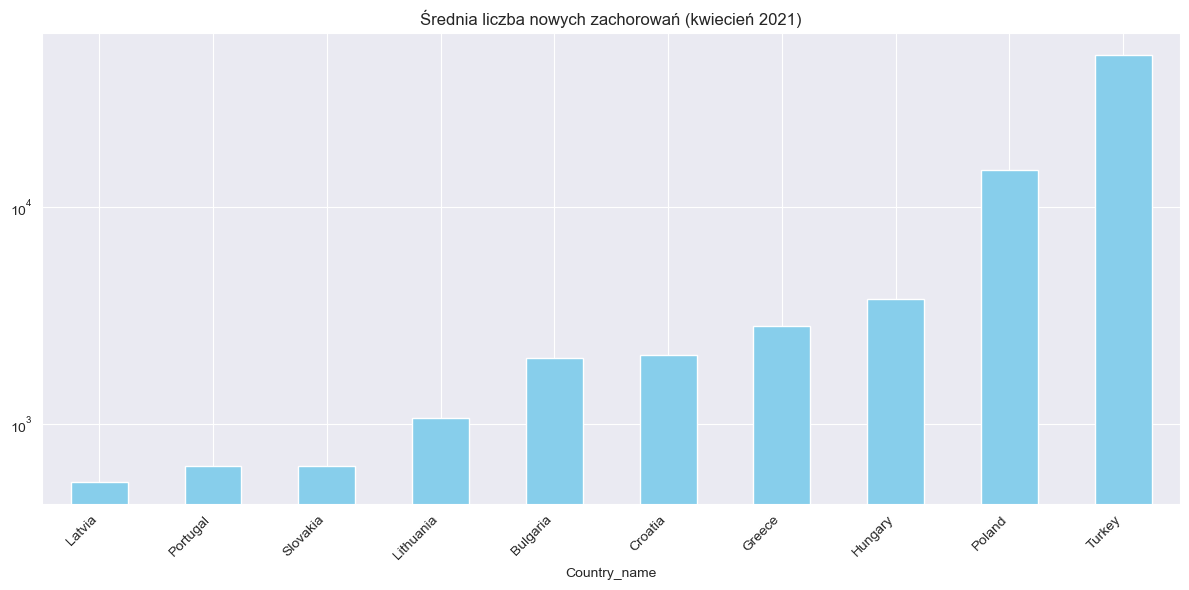

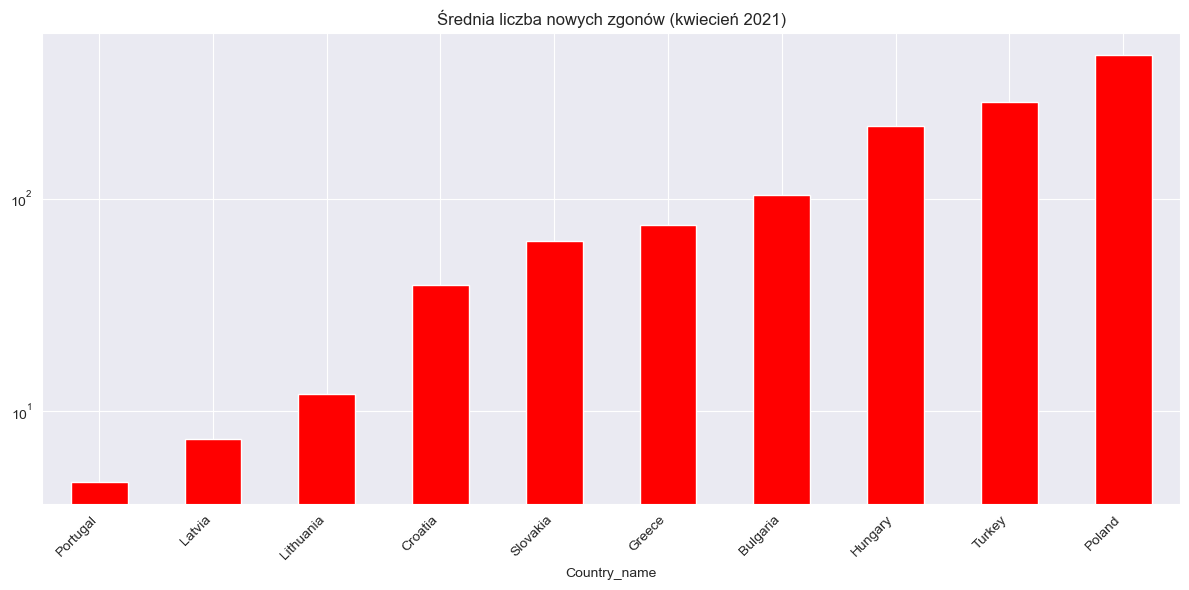

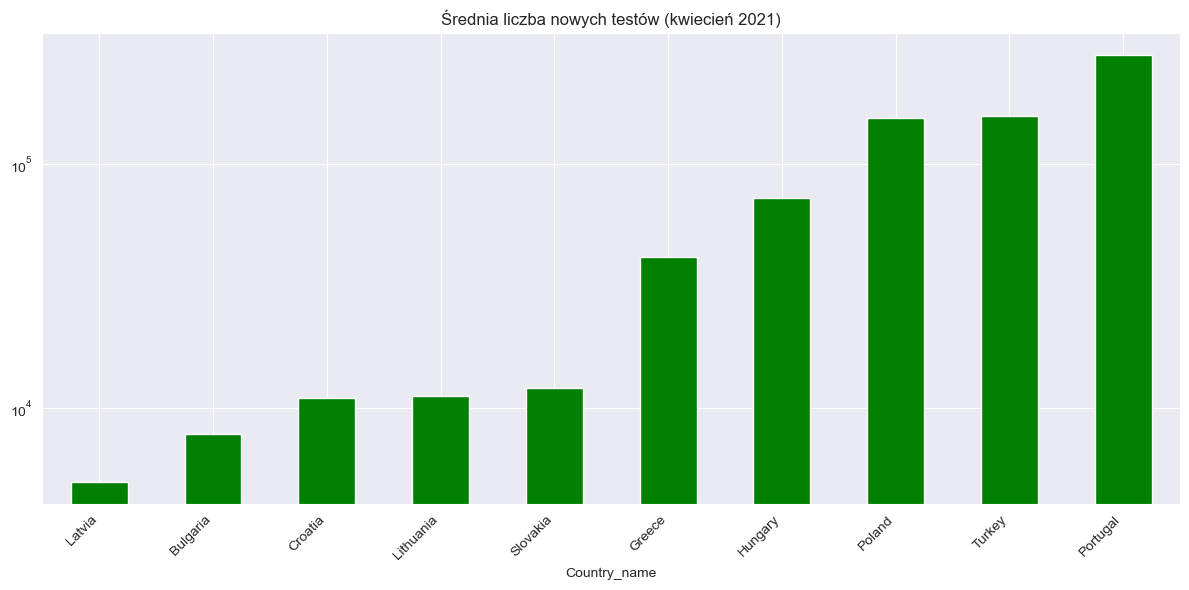

In [8]:
# 3.1.1. Średnia liczba nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].mean().sort_values()
plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", logy=True, color="skyblue")
plt.title("Średnia liczba nowych zachorowań (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.1.2. Średnia liczba nowych zgonów
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].mean().sort_values()
plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", logy=True, color="red")
plt.title("Średnia liczba nowych zgonów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.1.3. Średnia liczba nowych szczepień
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].mean().sort_values()
plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", logy=True, color="green")
plt.title("Średnia liczba nowych testów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Uwaga - dane dla Portugalii pochodzą tylko z 5 dni, a dla Grecji z 20. Reszta państw notowała w miarę dobrze z 25-31 dni


### 3.2. Różnic dziennych dla wybranych metryk

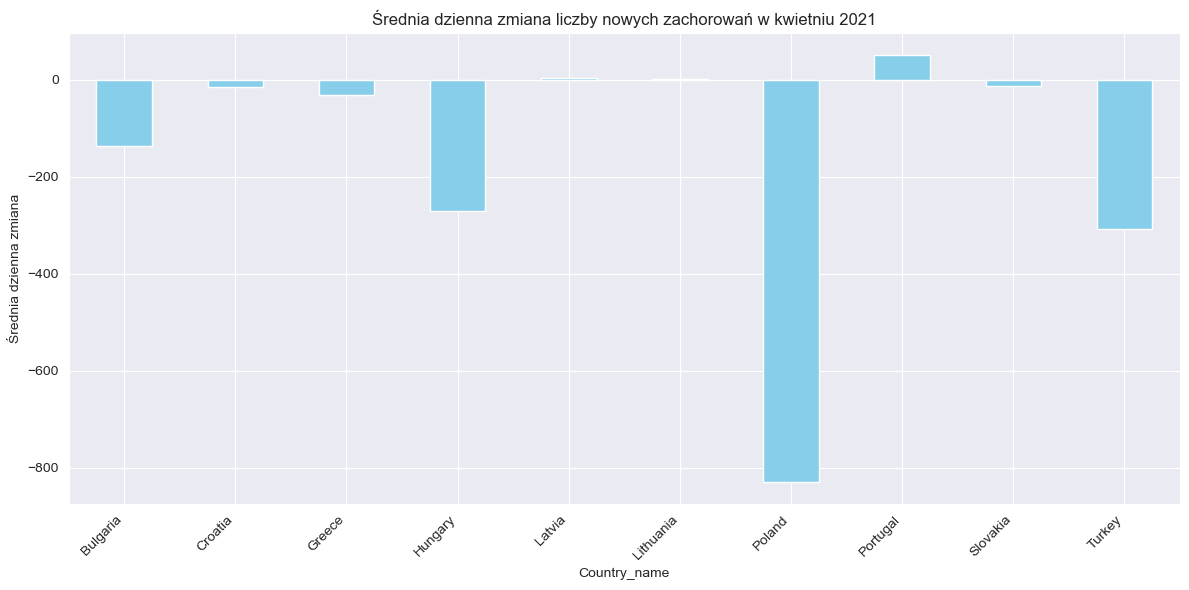

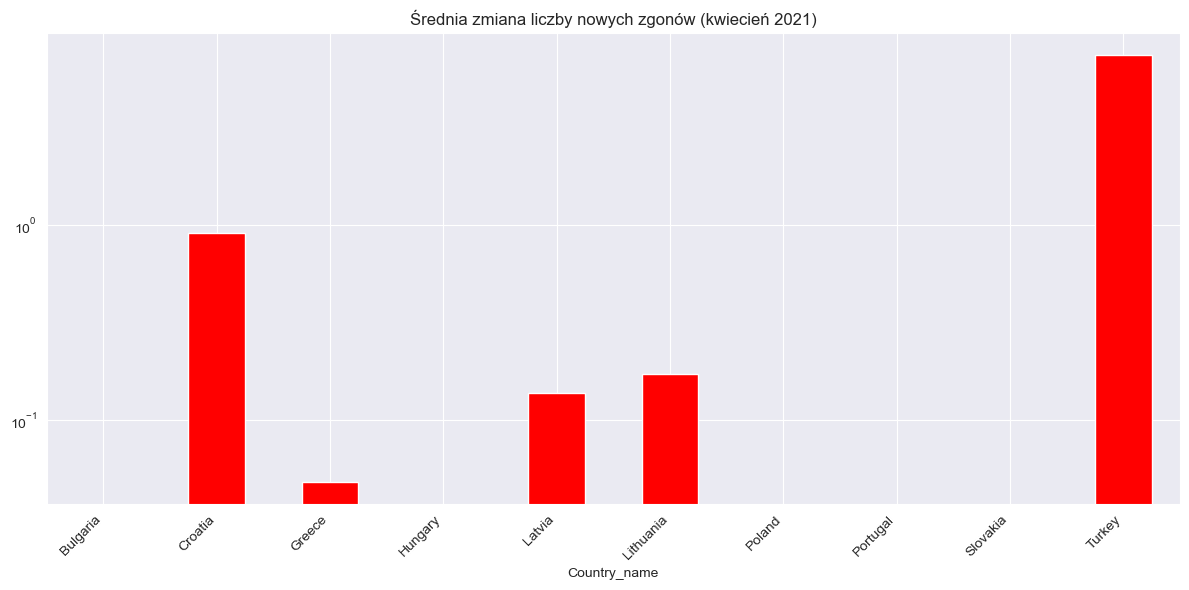

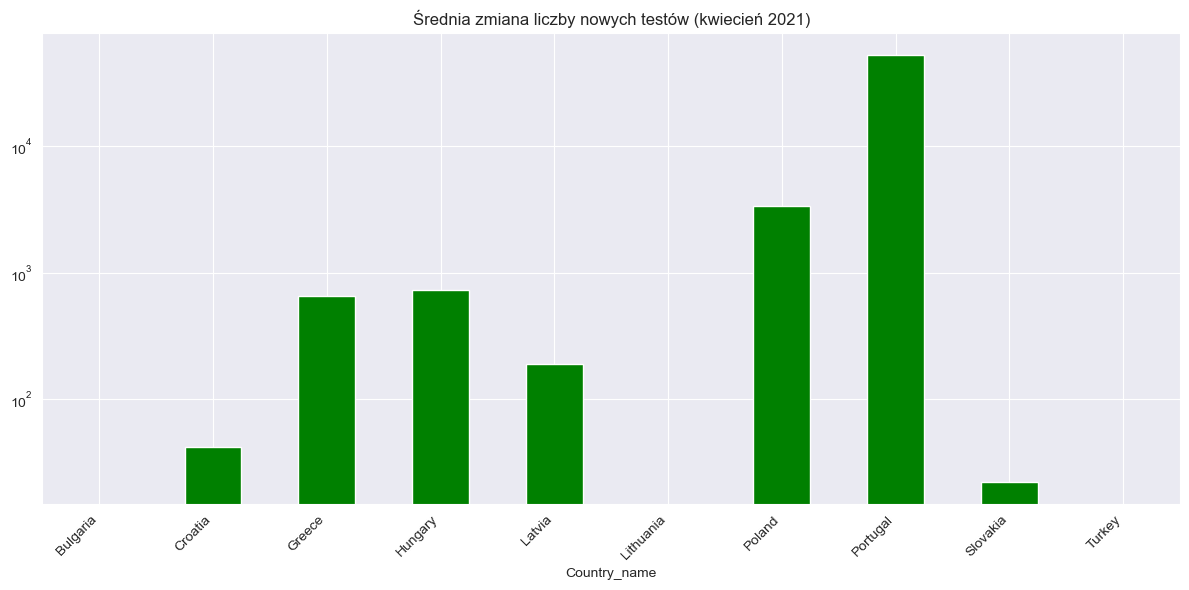

In [9]:
# 3.2.1. Średnia różnica nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].diff().groupby(df_filtered["Country_name"]).mean()

plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue", figsize=(12, 6))
plt.title("Średnia dzienna zmiana liczby nowych zachorowań w kwietniu 2021")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Średnia dzienna zmiana")
plt.tight_layout()
plt.show()

# 3.2.2. Średnia różnica dziennych śmierci
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].diff().groupby(df_filtered["Country_name"]).mean()

plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", logy=True, color="red")
plt.title("Średnia zmiana liczby nowych zgonów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.2.3. Średnia różnica dziennych testów
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].diff().groupby(df_filtered["Country_name"]).mean()

plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", logy=True, color="green")
plt.title("Średnia zmiana liczby nowych testów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 3.3. Mediana wybranych metryk

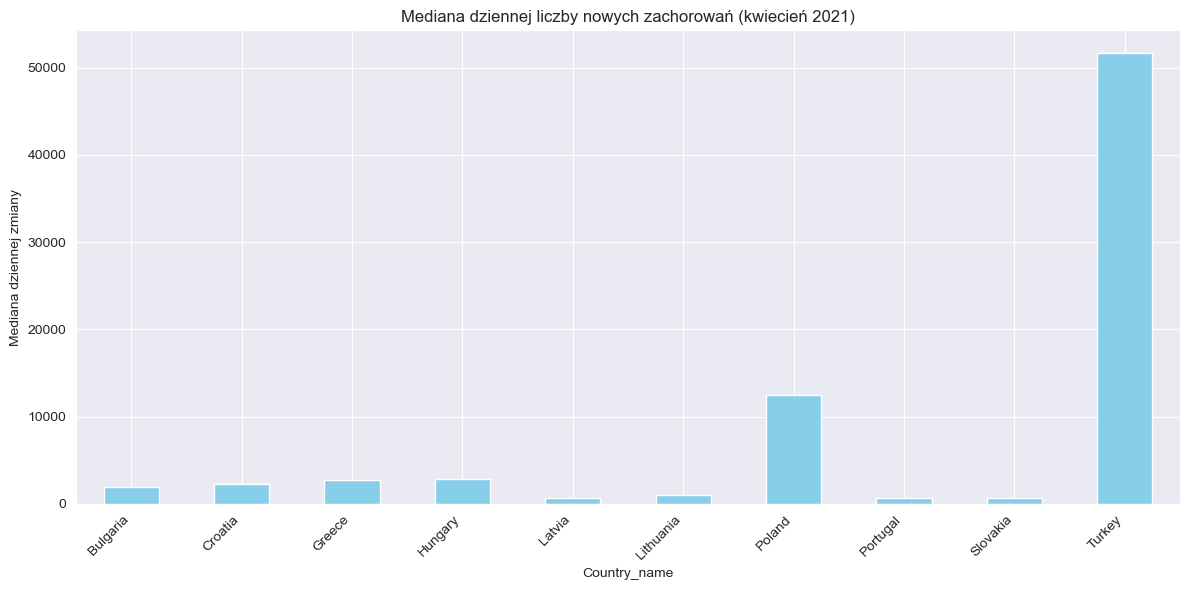

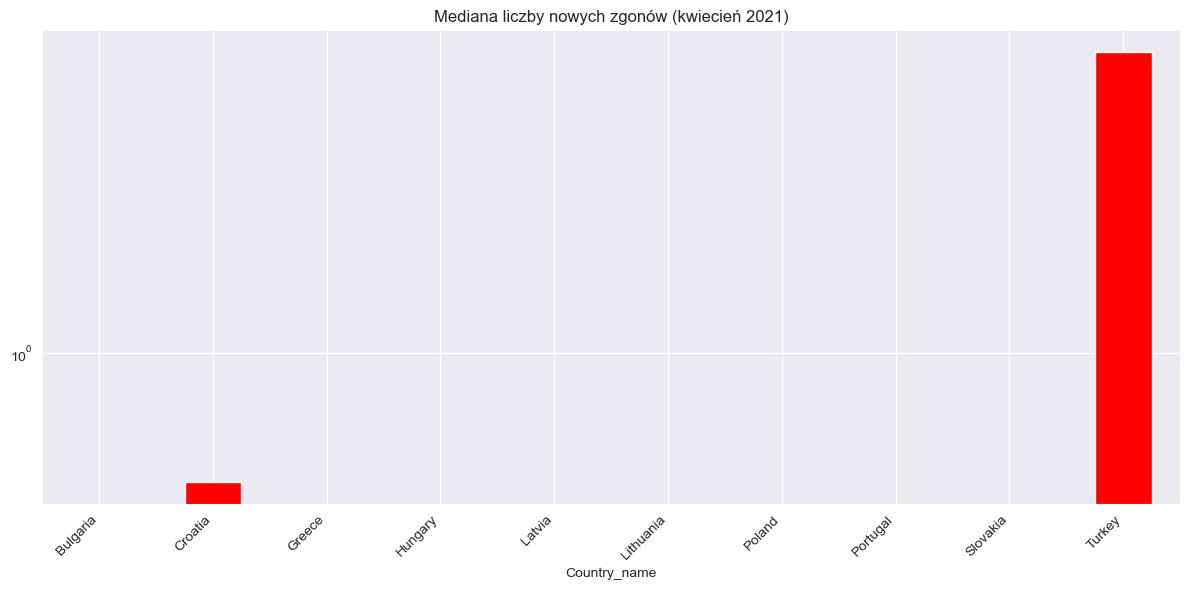

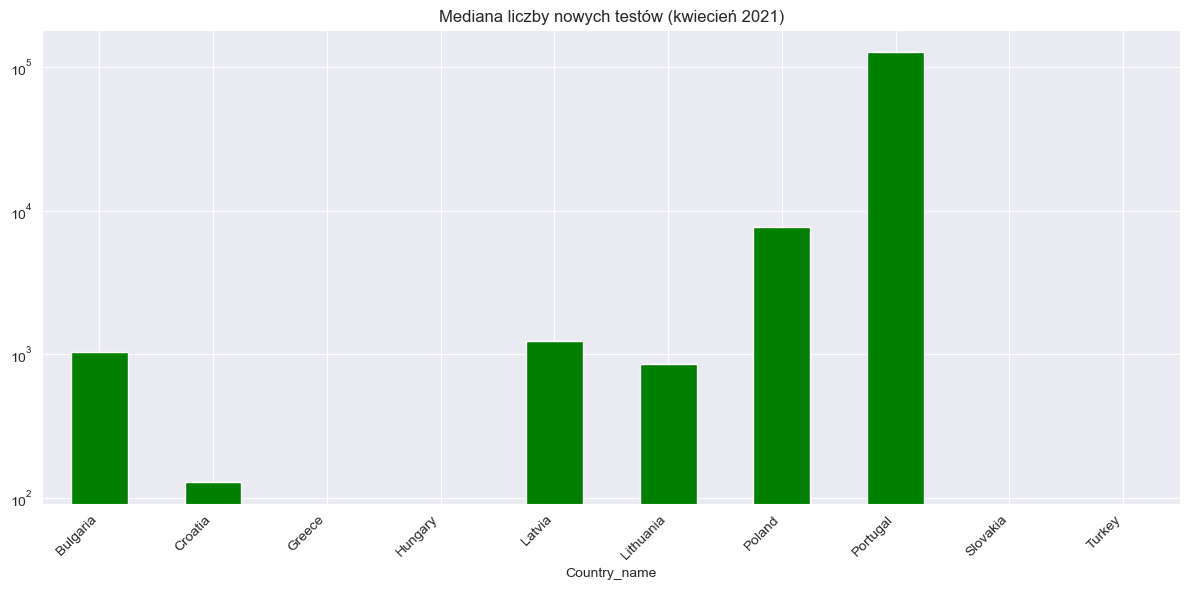

In [12]:
# 3.2.1. Mediana nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].median()

plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue", figsize=(12, 6))
plt.title("Mediana dziennej liczby nowych zachorowań (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mediana dziennej zmiany")
plt.tight_layout()
plt.show()

# 3.2.2. Mediana nowych zgonów
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].diff().groupby(df_filtered["Country_name"]).median()

plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", logy=True, color="red")
plt.title("Mediana liczby nowych zgonów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.2.3. Mediana nowych szczepień
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].diff().groupby(df_filtered["Country_name"]).median()

plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", logy=True, color="green")
plt.title("Mediana liczby nowych testów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


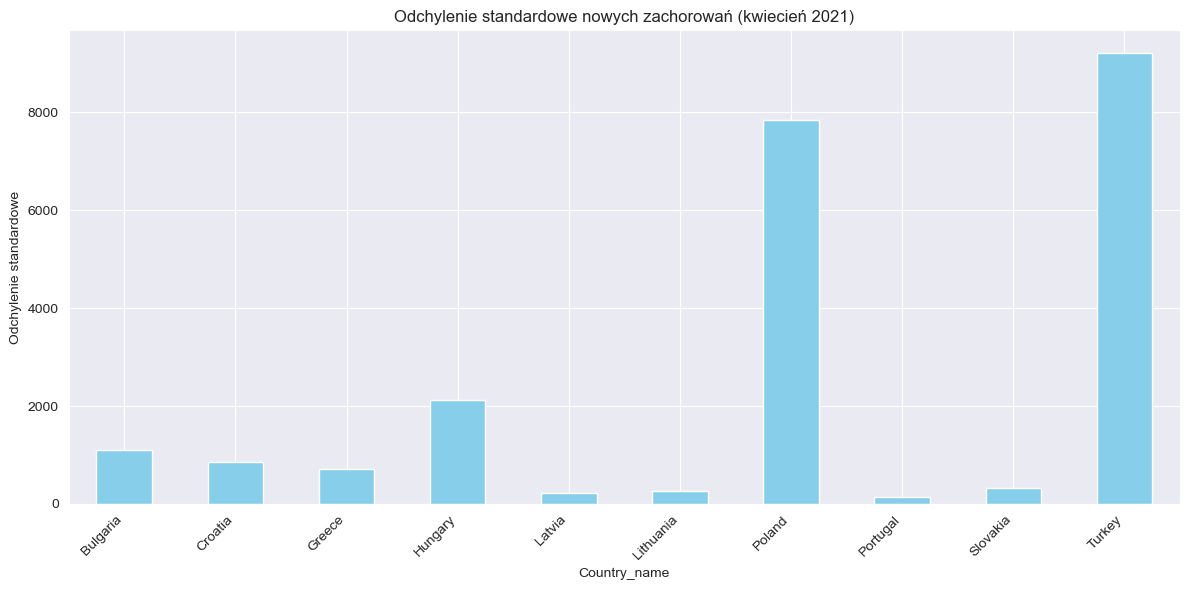

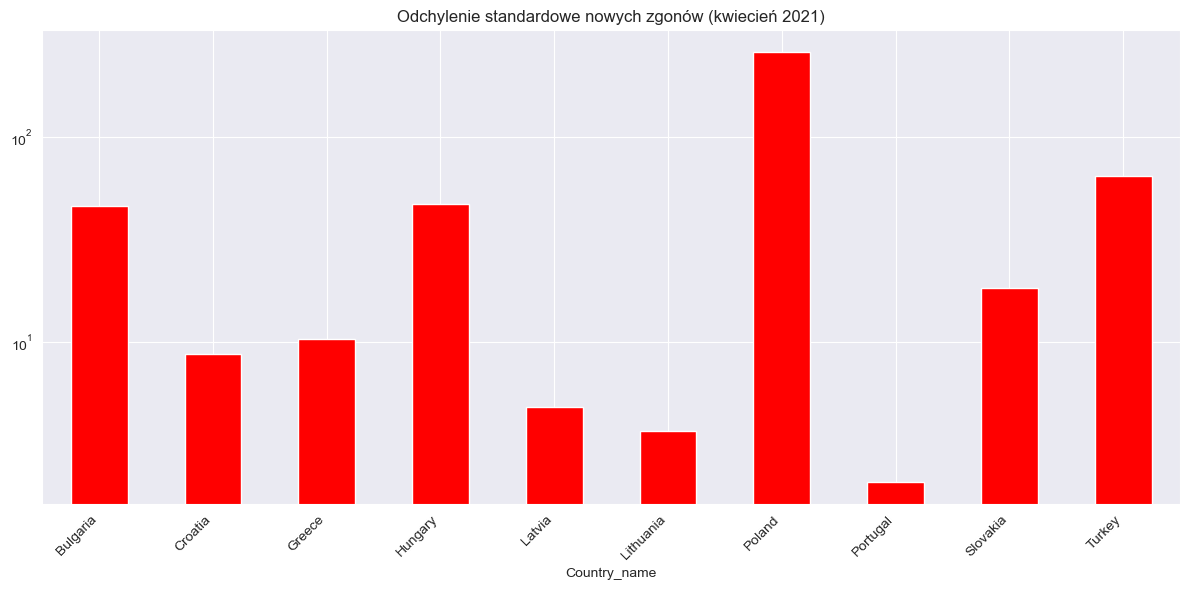

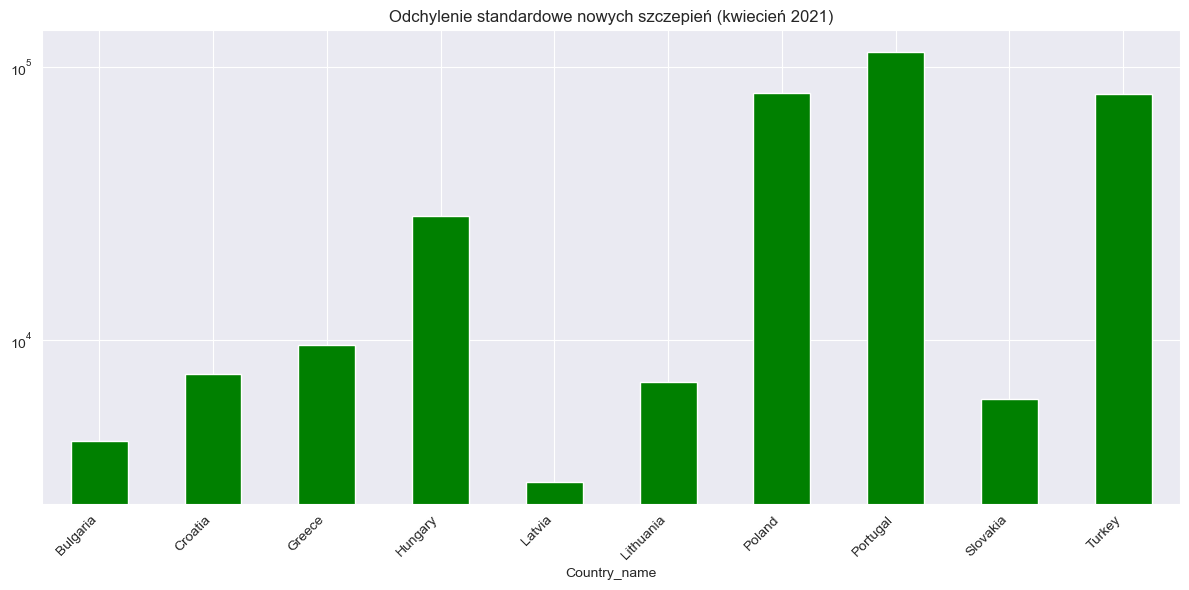

In [13]:
# 3.2.1. Odchylenie standardowe nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].std()

plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue", figsize=(12, 6))
plt.title("Odchylenie standardowe nowych zachorowań (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Odchylenie standardowe")
plt.tight_layout()
plt.show()

# 3.2.2. Odchylenie standardowe nowych zgonów
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].std()

plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", logy=True, color="red")
plt.title("Odchylenie standardowe nowych zgonów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.2.3. Odchylenie standardowe nowych szczepień
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].std()

plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", logy=True, color="green")
plt.title("Odchylenie standardowe nowych szczepień (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 3.5. Minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB wybranych krajów

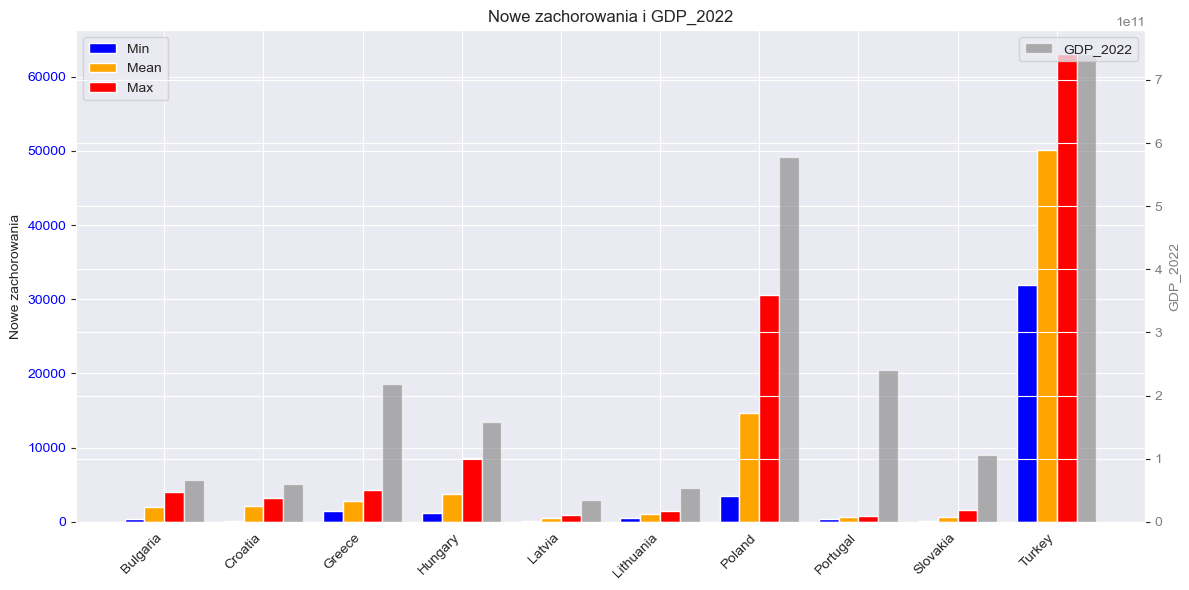

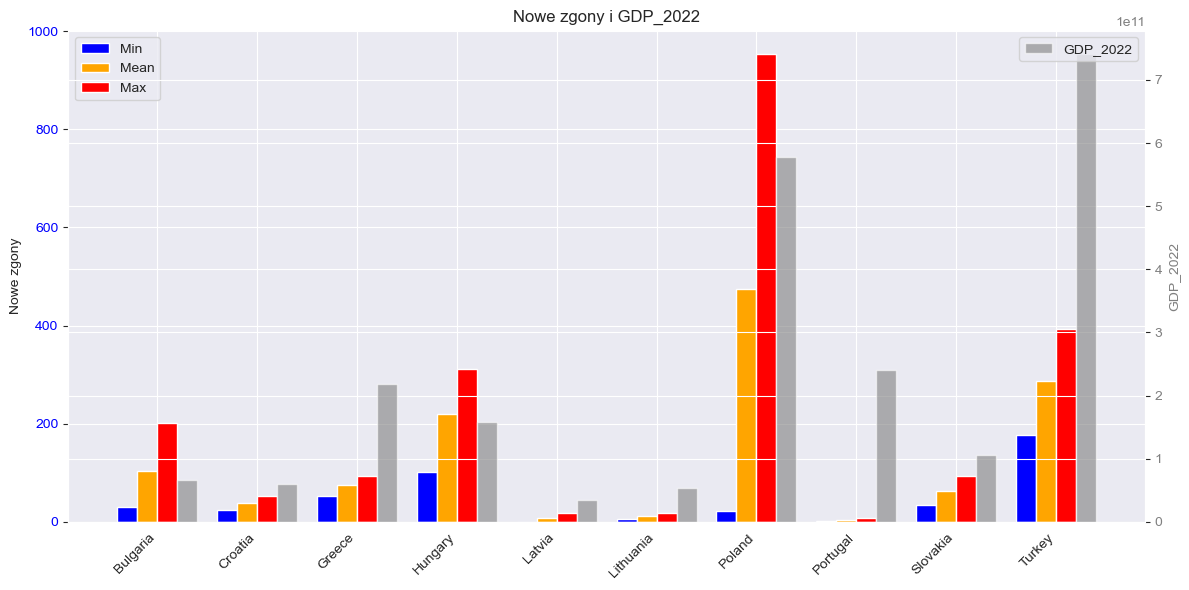

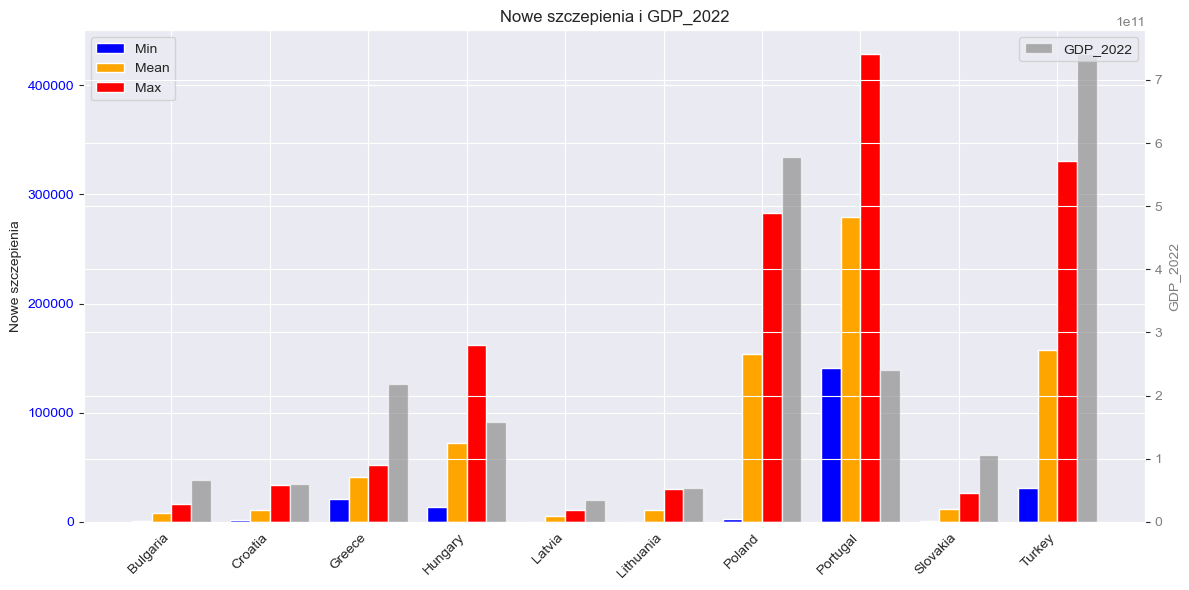

In [18]:
# Obliczenie statystyk dla nowych przypadków, zgonów i szczepień
summary_stats = df_filtered.groupby("Country_name").agg({
    "Total_confirmed_cases": ["min", "mean", "max"],
    "Total_new_deceased": ["min", "mean", "max"],
    "Total_new_vaccinations": ["min", "mean", "max"],
    "GDP_2022": "first"
})

metrics = ["Total_confirmed_cases", "Total_new_deceased", "Total_new_vaccinations"]
titles = ["Nowe zachorowania", "Nowe zgony", "Nowe szczepienia"]
stat_labels = ["Min", "Mean", "Max"]
colors = ["blue", "orange", "red", "gray"]
width = 0.2

for i, metric in enumerate(metrics):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    countries = summary_stats.index

    metric_min = summary_stats[(metric, "min")]
    metric_mean = summary_stats[(metric, "mean")]
    metric_max = summary_stats[(metric, "max")]
    gdp_values = summary_stats[("GDP_2022", "first")]

    x = np.arange(len(countries))
    ax1.bar(x - 1.5 * width, metric_min, width=width, label="Min", color=colors[0])
    ax1.bar(x - 0.5 * width, metric_mean, width=width, label="Mean", color=colors[1])
    ax1.bar(x + 0.5 * width, metric_max, width=width, label="Max", color=colors[2])
    ax2 = ax1.twinx()
    ax2.bar(x + 1.5 * width, gdp_values, width=width, label="GDP_2022", color=colors[3], alpha=0.6)

    ax1.set_ylabel(titles[i])
    ax1.tick_params(axis='y', labelcolor="blue")
    ax2.set_ylabel("GDP_2022", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    ax1.set_xticks(x)
    ax1.set_xticklabels(countries, rotation=45, ha="right")
    ax1.set_title(f"{titles[i]} i GDP_2022")

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

### 3.6. Minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co wybranych krajów.

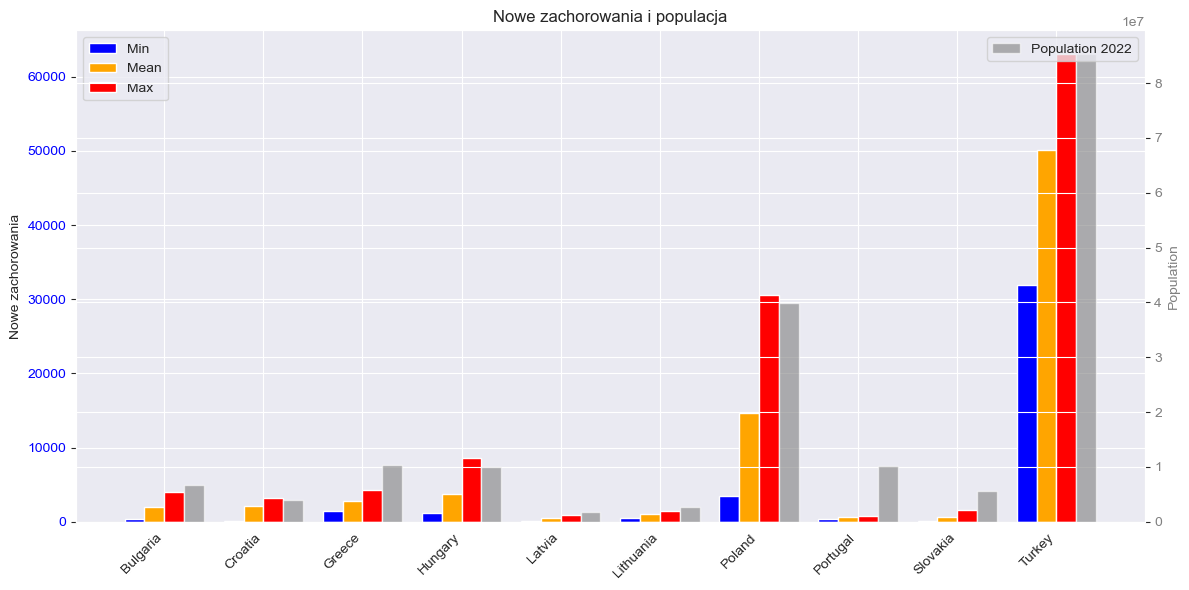

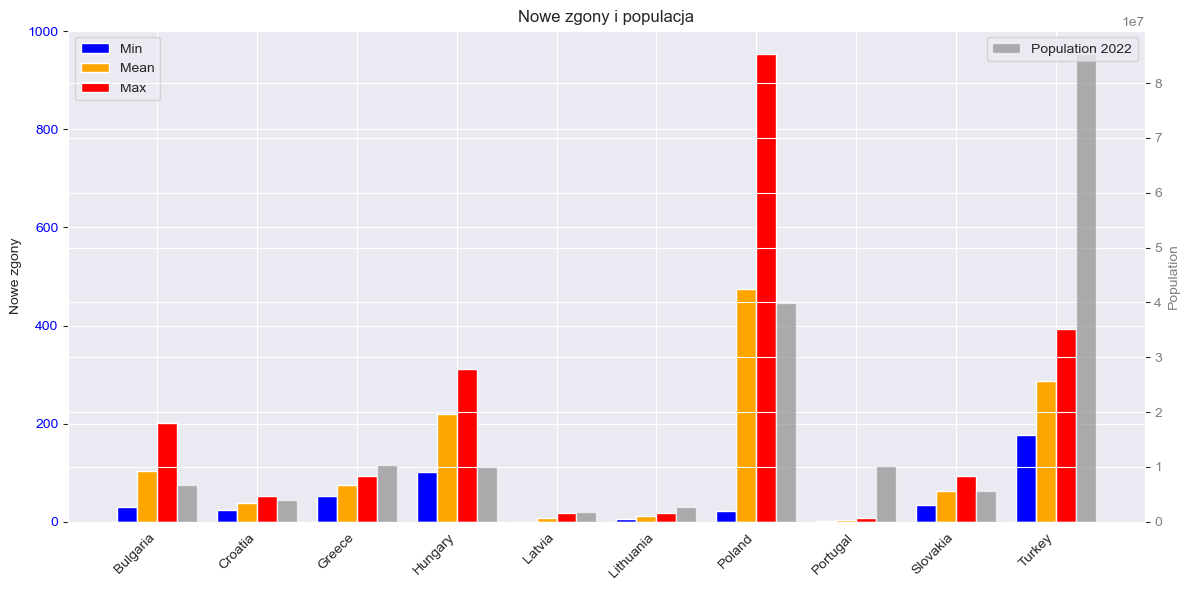

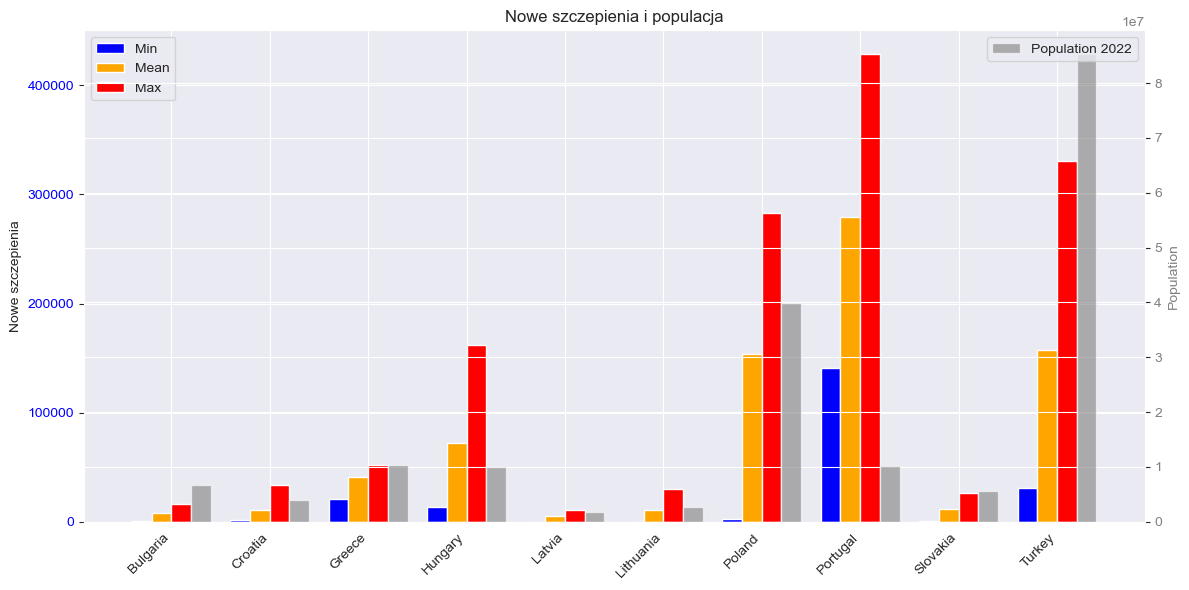

In [22]:
# Obliczenie statystyk dla nowych przypadków, zgonów i szczepień
summary_stats = df_filtered.groupby("Country_name").agg({
    "Total_confirmed_cases": ["min", "mean", "max"],
    "Total_new_deceased": ["min", "mean", "max"],
    "Total_new_vaccinations": ["min", "mean", "max"],
    "2022 Population": "first"
})

metrics = ["Total_confirmed_cases", "Total_new_deceased", "Total_new_vaccinations"]
titles = ["Nowe zachorowania", "Nowe zgony", "Nowe szczepienia"]
stat_labels = ["Min", "Mean", "Max"]
colors = ["blue", "orange", "red", "gray"]
width = 0.2

for i, metric in enumerate(metrics):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    countries = summary_stats.index

    metric_min = summary_stats[(metric, "min")]
    metric_mean = summary_stats[(metric, "mean")]
    metric_max = summary_stats[(metric, "max")]
    population_values = summary_stats[("2022 Population", "first")]

    x = np.arange(len(countries))
    ax1.bar(x - 1.5 * width, metric_min, width=width, label="Min", color=colors[0])
    ax1.bar(x - 0.5 * width, metric_mean, width=width, label="Mean", color=colors[1])
    ax1.bar(x + 0.5 * width, metric_max, width=width, label="Max", color=colors[2])
    ax2 = ax1.twinx()
    ax2.bar(x + 1.5 * width, population_values, width=width, label="Population 2022", color=colors[3], alpha=0.6)

    ax1.set_ylabel(titles[i])
    ax1.tick_params(axis='y', labelcolor="blue")
    ax2.set_ylabel("Population", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    ax1.set_xticks(x)
    ax1.set_xticklabels(countries, rotation=45, ha="right")
    ax1.set_title(f"{titles[i]} i populacja")

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

### Część 4 (poziom podstawowy) - agregacja danych